In [1]:

import numpy as np
import matplotlib.pyplot as plt
import glob
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

In [80]:
from skimage.transform import rescale, resize
def load_data(filename):
    im=plt.imread(filename)
    return im

def preprocess(im):
    im2 = resize(im, (224,224,3), anti_aliasing=True)
    return im2
    

In [82]:
# Load in data
import glob
train_data_faw = glob.glob('data/train/FAW/*JPG')
ex1 = load_data(train_data_faw[100])
ex2 = load_data(train_data_faw[320])
ex3 = load_data(train_data_faw[52])

ex1=preprocess(ex1)
ex2=preprocess(ex2)
ex3=preprocess(ex3)


/Users/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


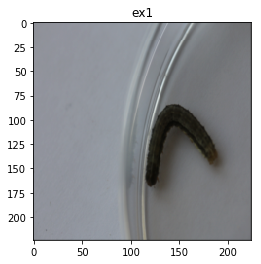

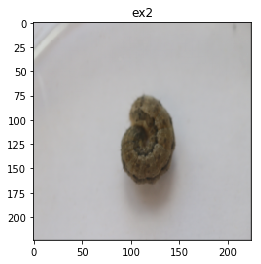

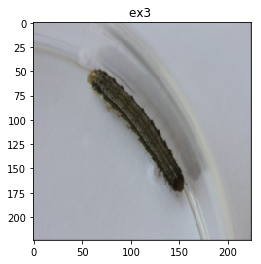

In [83]:
# Plot the first day of data
%matplotlib inline
#%matplotlib tk

plt.imshow(ex1)
plt.title('ex1')
plt.show()

plt.imshow(ex2)
plt.title('ex2')
plt.show()

plt.imshow(ex3)
plt.title('ex3 ')
plt.show()

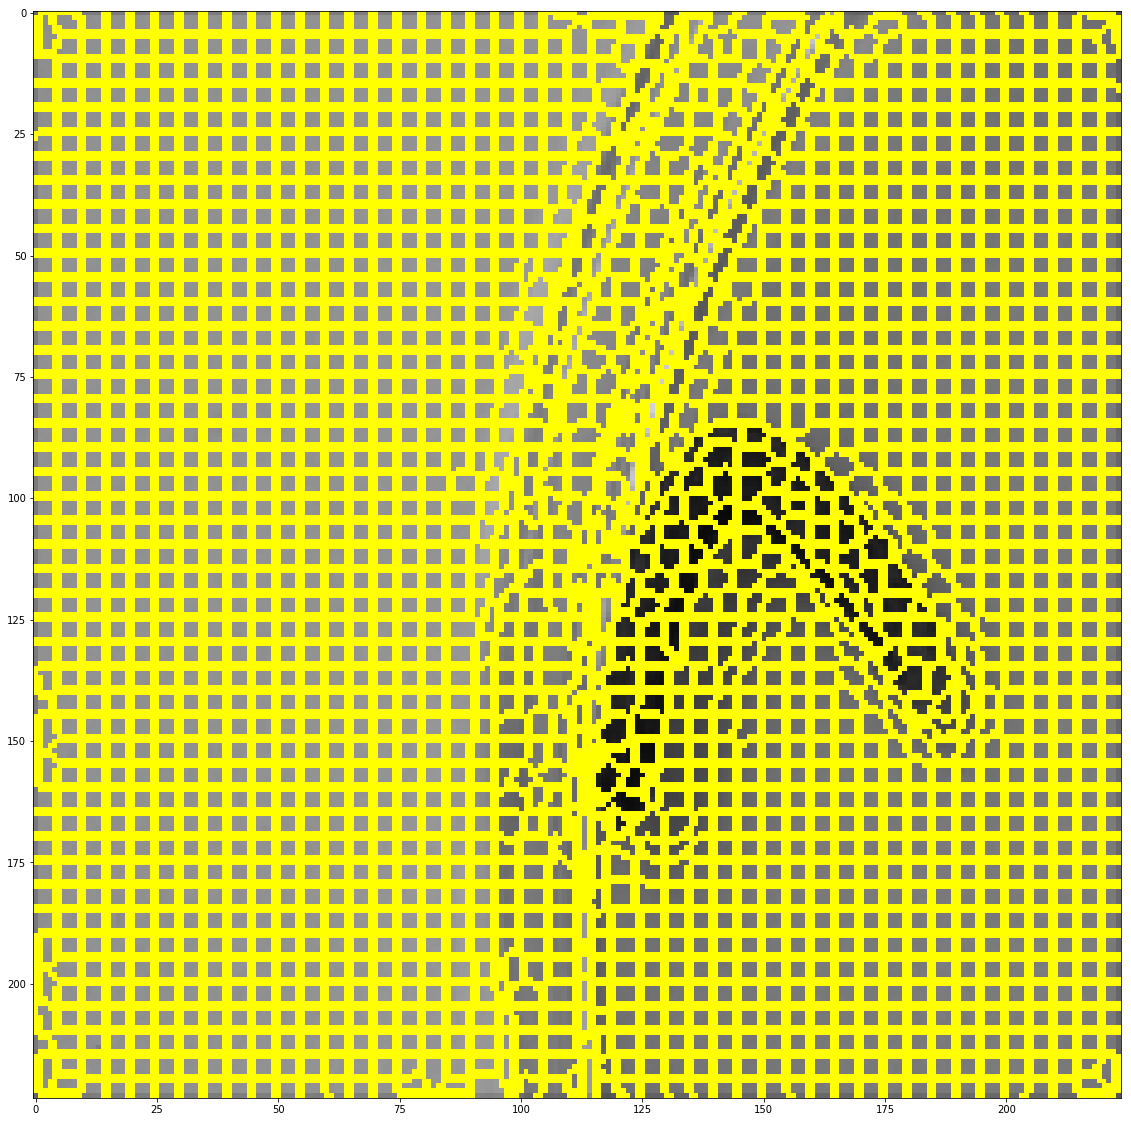

In [89]:
number_segments=2000
segments = slic(ex1, n_segments=number_segments, compactness=0.1, sigma = 0,convert2lab=False)
plt.figure(figsize=(20,20))
plt.imshow(mark_boundaries(ex1[:,:,0], segments))
plt.show()

In [90]:
import pandas as pd
def calculate_segment_stats(data,segments):
    # turn the image into a 2D array (pix by channel)
    d1_flat = pd.DataFrame(np.ravel(data).reshape((-1,3)))

    # add the label vector
    d1_flat['spID'] = np.ravel(segments)

    # calculate the mean by segment
    return d1_flat.groupby('spID').mean().values

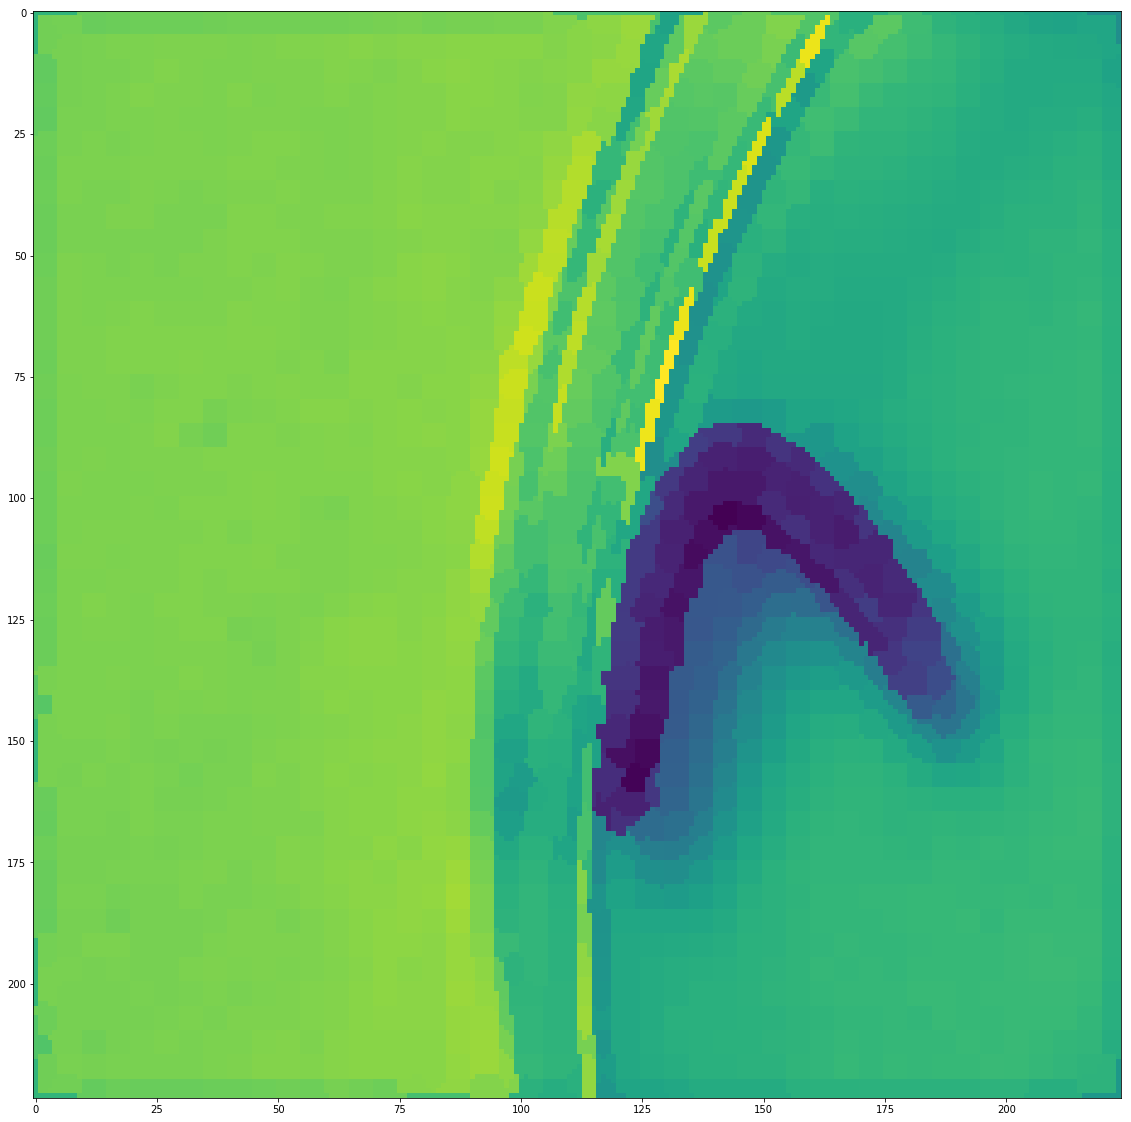

In [91]:
seg_means = calculate_segment_stats(ex1,segments)
plt.figure(figsize=(20,20))
# broadcast the mean pixel values from the first channel
# to the same shape as the original image array
plt.imshow(seg_means[:,0][segments])

In [92]:


from sklearn import cluster,preprocessing

kmeans_3clusters=cluster.KMeans(n_clusters=3)
kmeans_3clusters.fit(seg_means)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

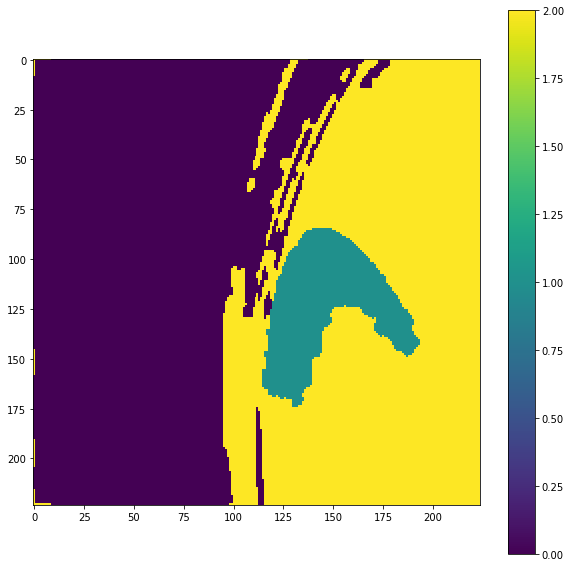

In [93]:


plt.figure(figsize=(10,10))
plt.imshow(kmeans_3clusters.labels_[segments])
plt.colorbar()



In [94]:
def predict(data, model, number_segments=number_segments):
    """ returns label image"""
    # segment the image
    test_segments = slic(data,
                         n_segments=number_segments,
                         compactness=0.1,
                         sigma = 0,
                         convert2lab=False)
    
    # calculate seg stats 
    test_set = calculate_segment_stats(data,test_segments)
    
    # predict
    test_set_segment_labels=model.predict(test_set)
    
    # code via broadcasting
    return test_set_segment_labels[test_segments]

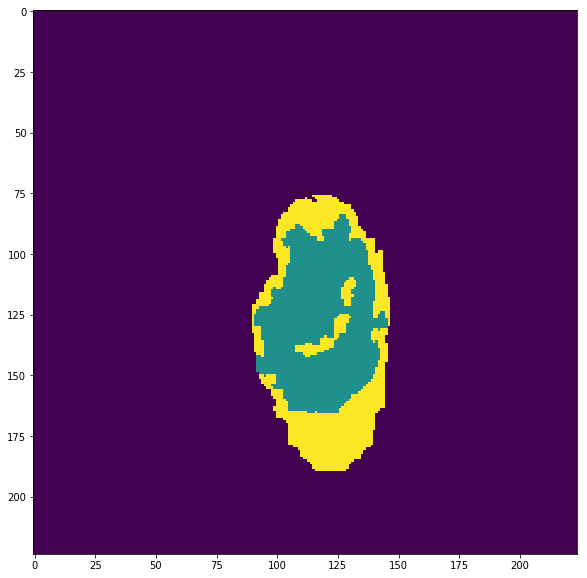

In [95]:
ex2_labels=predict(ex2,kmeans_3clusters)
plt.figure(figsize=(10,10))
plt.imshow(ex2_labels)
plt.show()

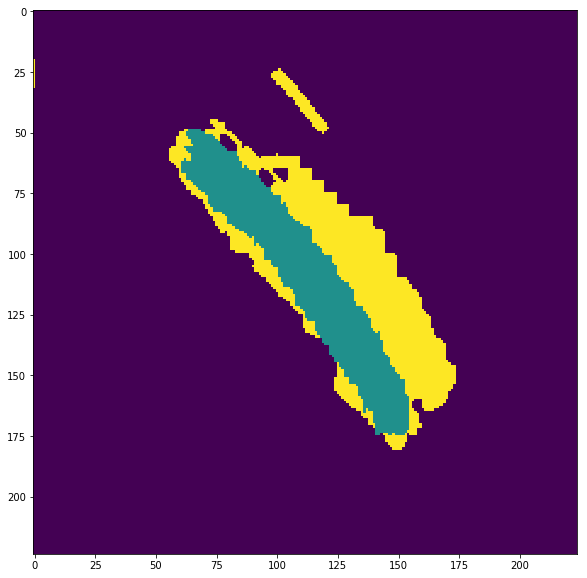

In [96]:
ex3_labels=predict(ex3,kmeans_3clusters)
plt.figure(figsize=(10,10))
plt.imshow(ex3_labels)
plt.show()

In [98]:
train_data_notfaw = glob.glob('data/train/not_FAW/*JPG')
ex4 = load_data(train_data_notfaw[100])
ex5= load_data(train_data_notfaw[320])
ex6 = load_data(train_data_notfaw[52])

ex4=preprocess(ex4)
ex5=preprocess(ex5)
ex6=preprocess(ex6)

/Users/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


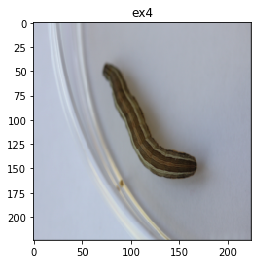

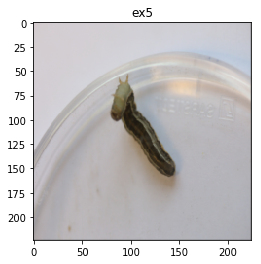

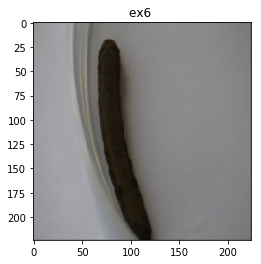

In [99]:
plt.imshow(ex4)
plt.title('ex4')
plt.show()

plt.imshow(ex5)
plt.title('ex5')
plt.show()

plt.imshow(ex6)
plt.title('ex6 ')
plt.show()

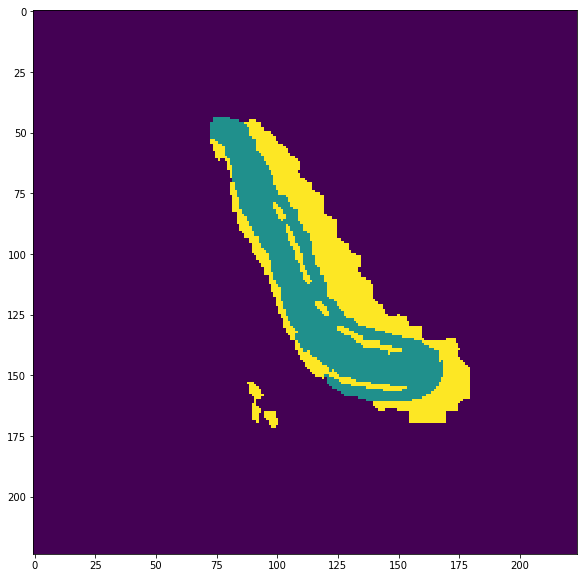

In [100]:
ex4_labels=predict(ex4,kmeans_3clusters)
plt.figure(figsize=(10,10))
plt.imshow(ex4_labels)
plt.show()

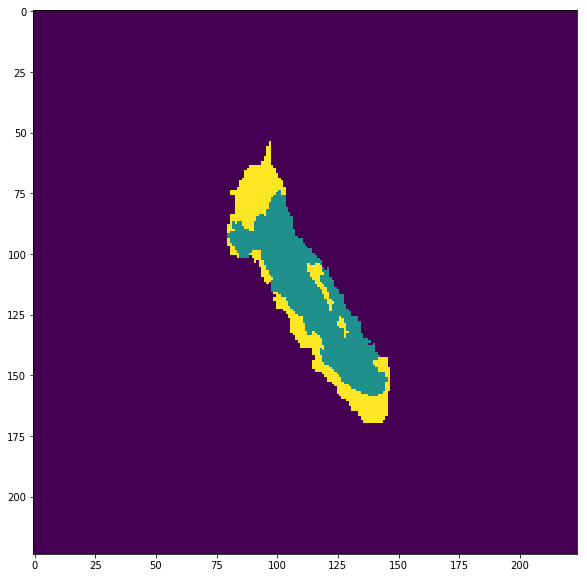

In [101]:
ex5_labels=predict(ex5,kmeans_3clusters)
plt.figure(figsize=(10,10))
plt.imshow(ex5_labels)
plt.show()

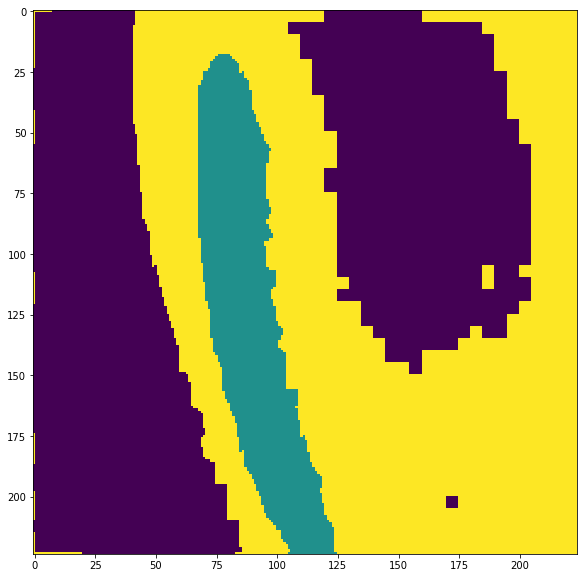

In [102]:
ex6_labels=predict(ex6,kmeans_3clusters)
plt.figure(figsize=(10,10))
plt.imshow(ex6_labels)
plt.show()

In [103]:
import pickle
pickle.dump(kmeans_3clusters, open('kmeans_224.sav', 'wb'))

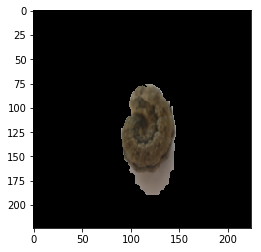

In [104]:
im2=np.array(ex2)
im2[:,:,0][ex2_labels==0]=0
im2[:,:,1][ex2_labels==0]=0
im2[:,:,2][ex2_labels==0]=0
plt.imshow(im2)
plt.show()

In [77]:
im2.shape

(2432, 3648, 3)